# The Sparks Foundation


## Task 1: Predicting the percentage of student based on the number of hours they study.

## Author: Pratiksha Jadli

Description:
Data of study hours with corresponding scores has been provided in the below link
Dataset: http://bit.ly/w-data


Main Problem:
Here, I want to predict the percentage of student based on the number of hours using the supervised learning algorithm.
As in this case there is only one independent variable and one dependent variable and therefore, I 'm using the Simple Linear Regression technique.

##  Importing neccesary libraries like numpy, pandas, matplotlib, seaborn, sklearn

In [97]:
import numpy as np  # For numerical analysis like using mathematical operations
import pandas as pd # For Data manipulation
import matplotlib.pyplot as plt # For Data visulization like charts/graphs
import seaborn as sns # For Data visulization, using sens.set() to map the seaborn themes to matplotlib 
sns.set()
from sklearn.linear_model import LinearRegression # Sklearn is for machine learning libraries 



## Load the data

In [98]:
# Data file link stored in variable namely 'link'
link="http://bit.ly/w-data"

# Reading the data
data=pd.read_csv(link)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Describing the data

In [99]:
# Statistics information of the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [100]:
# Looking for null values in the data, if any.
data.isnull().any()

Hours     False
Scores    False
dtype: bool

# Defing independent and dependent variables

In [71]:
# Defining independent variable (Hours) using the iloc function
X=data.iloc[:,:1].values 

# Defining dependent variable (Scores) using the iloc function
y=data.iloc[:,1].values 


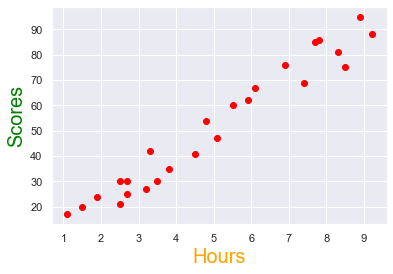

In [101]:
# Plotting Hours Vs Scores
plt.scatter(X,y,c='red')
plt.xlabel("Hours",fontsize=20, c='orange')
plt.ylabel("Scores",fontsize=20, c='green')
plt.show()


### Clearly from the above graph, Hours and Scores holds a relation between them.

# Linear Regression Model

In simple linear regression model, two variables holds a causal relationship between them, i.e. change in one variable leads to change in other one as well.

Y = (b_0) + (b_1) * X where

X- Independent variable, 
Y- Dependent variable, 
b_0- Intercept, 
b_1- Coefficient of independent variable


### Dividing the original dataset into train and test data, with test size of 80%-20%, i.e. 80% train data and 20% test data, using the sklearn, train-test split.

In [102]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


### Defining the model

In [103]:

reg=LinearRegression()

# Firstly, training the Linear regression model with train data. 
reg.fit(X_train,y_train)

LinearRegression()

In [104]:
reg.coef_ # Coefficient of independent variable(b_1)

array([9.91065648])

In [105]:
reg.intercept_ # Intercept (b_0)

2.018160041434683

# Making Prediction

### Testing the model by passing the test data

In [106]:

pred=reg.predict(X_test)


### New data frame has been ceated to show the actual and predicted scores, corresponding to the hours test data.

In [107]:

A_P={"Actual(Scores)": y_test ,"Predicted(Scores)": pred}
new_data=pd.DataFrame(A_P)
new_data["X_test(Hours)"]= X_test
new_data.set_index('X_test(Hours)')

,Actual(Scores),Predicted(Scores)
X_test(Hours),,
1.5,20,16.884145
3.2,27,33.732261
7.4,69,75.357018
2.5,30,26.794801
5.9,62,60.491033


### Fitting regression line 

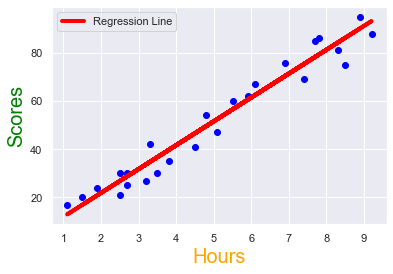

In [108]:

plt.scatter(X,y,c='blue')
y_hat1=reg.intercept_+reg.coef_*X
plt.plot(X,y_hat1,lw=4,c='red',label= 'Regression Line')
plt.xlabel("Hours",fontsize=20,c='orange')
plt.ylabel("Scores",fontsize=20,c='green')
plt.legend()
plt.show()



## Predict the score of student who has been studying for 9.5 hours.

In [109]:
pred_val=np.array([9.5])
y_hat1=reg.intercept_+reg.coef_*pred_val
y_hat1

array([96.16939661])

## Model Evaluation Metric

### To quantify the model performance, mean absolute error and mean squared error are used in this case.

In [95]:


from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt as sq

In [110]:
print("MAE test score : ", mean_absolute_error(y_test,pred))
print("RMSE test score : ", sq(mean_squared_error(y_test,pred)))

MAE test score :  4.183859899002975
RMSE test score :  4.6474476121003665
